In [1]:
import pandas as pd
import keras
from keras import Sequential, layers
from keras.layers import Dense
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

games = pd.read_csv("/Users/juanhuml/Desktop/total_games.csv")
#games = pd.read_csv("/Users/juanhuml/Desktop/2018_home_team.csv")


dataset = games.values
X = dataset[:,3:17].astype(float)
Y = dataset[:,0]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.3, random_state=0)

Using TensorFlow backend.


[[0.23582766 0.43037975 0.58368679 ... 0.35       0.7480916  0.48979592]
 [0.23582766 0.43037975 0.58368679 ... 0.35       0.7480916  0.48979592]
 [0.63718821 0.6835443  0.48026101 ... 0.6        0.36423119 0.48979592]
 ...
 [0.07936508 0.65316456 0.79265905 ... 0.65       0.49618321 0.16326531]
 [0.5600907  0.63291139 0.39983687 ... 0.7        0.18211559 0.30612245]
 [0.45578231 0.32405063 0.53376835 ... 0.5        0.18211559 0.34693878]]


In [2]:
model = Sequential()
model.add(Dense(20, input_dim=14, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(14, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train,
                    batch_size=2,
                    epochs=300,
                    #validation_data=(x_val, y_val)
                   )

print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=2)
print('test loss, test acc:', results)

W1108 23:04:17.185150 4401194432 deprecation_wrapper.py:119] From /Users/juanhuml/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1108 23:04:17.199095 4401194432 deprecation_wrapper.py:119] From /Users/juanhuml/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1108 23:04:17.201685 4401194432 deprecation_wrapper.py:119] From /Users/juanhuml/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1108 23:04:17.216084 4401194432 deprecation_wrapper.py:119] From /Users/juanhuml/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                300       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                294       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
373/373 [==============================] - 0s 1ms/step - loss: 0.6721 - acc: 0.5791
Epoch 2/300
373/373 [=====

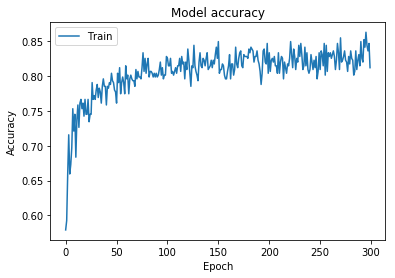

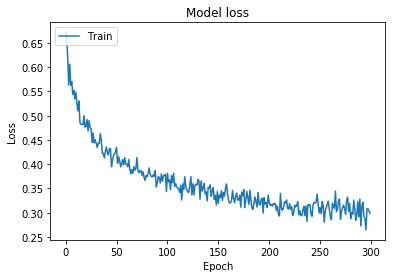

In [4]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [5]:
games_to_predict = pd.read_csv("/Users/juanhuml/Desktop/games_to_predict.csv")
print(games_to_predict)
preds = games_to_predict.values
X_to_predict = preds

pred_scalar = MinMaxScaler()
pred_scalar.fit(X_to_predict)
X_pred = pred_scalar.transform(X_to_predict)
print(X_pred)


predictions = model.predict_classes(X_to_predict)
predictions

    points_against_per_game.x  points_per_game.x  simple_rating_system.x  \
0                        11.7               44.2                   20.01   
1                        25.9               29.5                    4.56   
2                        28.8               27.2                    3.98   
3                        29.1               17.1                   -7.34   
4                        25.4               24.9                   -4.12   
5                        29.1               17.1                   -7.34   
6                        20.8               33.8                   11.09   
7                        30.0                4.0                   -7.00   
8                        24.6               38.0                    9.15   
9                        31.9               32.8                    5.24   
10                       27.1               27.9                    5.88   
11                       28.5               29.0                   -1.01   
12          

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)